# EDA and Feature Engineering

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# display all the rows and columns

# pd.set_option('display.max_rows', None)
# pd.set_option('display.max_columns', None)

In [3]:
# dataset path
path = "../All_data_sets/eda_dataset/flight_price.xlsx"

In [4]:
# Read the dataset
df = pd.read_excel(path)

### description about the dataset
### Airline : stores the airline company
### Date_of_Journey : stores the journay date
### Source : stores the flight starting point
### Destination : destination point
### Route : route the flight travelling
### Dep_Time : flight leaving time at source
### Arrival_Time : flight arriving time at destination
### Duration : journay duration
### Total_Stops : no.stops
### Additional_Info : 
### Price : price of flight tickets

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
# rows and columns
df.shape

(10683, 11)

In [7]:
# rename the columns with lowercase

df.rename(columns=str.lower , inplace=True)

df.head()

,airline,date_of_journey,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
# info about the each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   date_of_journey  10683 non-null  object
 2   source           10683 non-null  object
 3   destination      10683 non-null  object
 4   route            10682 non-null  object
 5   dep_time         10683 non-null  object
 6   arrival_time     10683 non-null  object
 7   duration         10683 non-null  object
 8   total_stops      10682 non-null  object
 9   additional_info  10683 non-null  object
 10  price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


### column : date_of_journey  

In [9]:
all_dates = df['date_of_journey'].str.split('/')

In [10]:
df['date'] = all_dates.str[0]
df['month'] = all_dates.str[1]
df['year'] = all_dates.str[2]

# chane the data type from object --> int

df['date'] = df['date'].astype(int)
df['month'] = df['month'].astype(int)
df['year'] = df['year'].astype(int)

# drop the date_of_journey column
df.drop(columns="date_of_journey",inplace = True )

In [11]:
df.head()

,airline,source,destination,route,dep_time,arrival_time,duration,total_stops,additional_info,price,date,month,year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   source           10683 non-null  object
 2   destination      10683 non-null  object
 3   route            10682 non-null  object
 4   dep_time         10683 non-null  object
 5   arrival_time     10683 non-null  object
 6   duration         10683 non-null  object
 7   total_stops      10682 non-null  object
 8   additional_info  10683 non-null  object
 9   price            10683 non-null  int64 
 10  date             10683 non-null  int32 
 11  month            10683 non-null  int32 
 12  year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 959.9+ KB


### column : arrival_time

In [13]:
df['arrival_time'] = df['arrival_time'].str.split(' ').str[0]

In [14]:
df['arrival_hrs'] = df['arrival_time'].str.split(':').str[0]
df['arrival_min'] = df['arrival_time'].str.split(':').str[1]

# change the data type
df['arrival_hrs'] = df['arrival_hrs'].astype(int)
df['arrival_min'] = df['arrival_min'].astype(int)

# drop arrival_time 
df.drop( columns="arrival_time" , axis=1 , inplace = True )

### column : dep_time

In [15]:
df['departure_hrs'] = df['dep_time'].str.split(':').str[0]
df['departure_min'] = df['dep_time'].str.split(':').str[1]


df['departure_hrs'] = df['departure_hrs'].astype(int)
df['departure_min'] = df['departure_min'].astype(int)

# drop dep_time
df.drop( columns="dep_time" , axis = 1 , inplace=True )

In [16]:
df.head(2)

,airline,source,destination,route,duration,total_stops,additional_info,price,date,month,year,arrival_hrs,arrival_min,departure_hrs,departure_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,5,50


### column : total_stops

In [17]:
df['total_stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [18]:
df[df['total_stops'].isnull()]

,airline,source,destination,route,duration,total_stops,additional_info,price,date,month,year,arrival_hrs,arrival_min,departure_hrs,departure_min
9039,Air India,Delhi,Cochin,NaN,23h 40m,NaN,No info,7480,6,5,2019,9,25,9,45


In [19]:
stops = {
    'non-stop' :0,
    '2 stops' :2, 
    '1 stop' :1, 
    '3 stops' :3, 
    '4 stops':4,
    np.nan:1
}

In [20]:
# maps total stops value
df['stops'] = df['total_stops'].map(stops)

df.drop( columns='total_stops' , inplace=True )

In [21]:
df.head()

,airline,source,destination,route,duration,additional_info,price,date,month,year,arrival_hrs,arrival_min,departure_hrs,departure_min,stops
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,No info,3897,24,3,2019,1,10,22,20,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,No info,7662,1,5,2019,13,15,5,50,2
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,No info,13882,9,6,2019,4,25,9,25,2
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,No info,6218,12,5,2019,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,No info,13302,1,3,2019,21,35,16,50,1


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   source           10683 non-null  object
 2   destination      10683 non-null  object
 3   route            10682 non-null  object
 4   duration         10683 non-null  object
 5   additional_info  10683 non-null  object
 6   price            10683 non-null  int64 
 7   date             10683 non-null  int32 
 8   month            10683 non-null  int32 
 9   year             10683 non-null  int32 
 10  arrival_hrs      10683 non-null  int32 
 11  arrival_min      10683 non-null  int32 
 12  departure_hrs    10683 non-null  int32 
 13  departure_min    10683 non-null  int32 
 14  stops            10683 non-null  int64 
dtypes: int32(7), int64(2), object(6)
memory usage: 959.9+ KB


In [23]:
# source and destination already exists so drop column route

df.drop(columns='route' , inplace=True)

In [24]:
df.head()

,airline,source,destination,duration,additional_info,price,date,month,year,arrival_hrs,arrival_min,departure_hrs,departure_min,stops
0,IndiGo,Banglore,New Delhi,2h 50m,No info,3897,24,3,2019,1,10,22,20,0
1,Air India,Kolkata,Banglore,7h 25m,No info,7662,1,5,2019,13,15,5,50,2
2,Jet Airways,Delhi,Cochin,19h,No info,13882,9,6,2019,4,25,9,25,2
3,IndiGo,Kolkata,Banglore,5h 25m,No info,6218,12,5,2019,23,30,18,5,1
4,IndiGo,Banglore,New Delhi,4h 45m,No info,13302,1,3,2019,21,35,16,50,1


### column : duration

In [25]:
def convert_duration_to_minutes(duration):
    # Default hours and minutes
    hours = 0
    minutes = 0

    # Split based on space
    parts = duration.strip().split()

    for part in parts:
        if 'h' in part:
            hours = int(part.replace('h', ''))
        elif 'm' in part:
            minutes = int(part.replace('m', ''))

    return hours * 60 + minutes

In [26]:
df['duration_min'] = df['duration'].apply(convert_duration_to_minutes)

df.drop(columns="duration" , inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   airline          10683 non-null  object
 1   source           10683 non-null  object
 2   destination      10683 non-null  object
 3   additional_info  10683 non-null  object
 4   price            10683 non-null  int64 
 5   date             10683 non-null  int32 
 6   month            10683 non-null  int32 
 7   year             10683 non-null  int32 
 8   arrival_hrs      10683 non-null  int32 
 9   arrival_min      10683 non-null  int32 
 10  departure_hrs    10683 non-null  int32 
 11  departure_min    10683 non-null  int32 
 12  stops            10683 non-null  int64 
 13  duration_min     10683 non-null  int64 
dtypes: int32(7), int64(3), object(4)
memory usage: 876.5+ KB


In [28]:
df.head()

,airline,source,destination,additional_info,price,date,month,year,arrival_hrs,arrival_min,departure_hrs,departure_min,stops,duration_min
0,IndiGo,Banglore,New Delhi,No info,3897,24,3,2019,1,10,22,20,0,170
1,Air India,Kolkata,Banglore,No info,7662,1,5,2019,13,15,5,50,2,445
2,Jet Airways,Delhi,Cochin,No info,13882,9,6,2019,4,25,9,25,2,1140
3,IndiGo,Kolkata,Banglore,No info,6218,12,5,2019,23,30,18,5,1,325
4,IndiGo,Banglore,New Delhi,No info,13302,1,3,2019,21,35,16,50,1,285


### apply one hot encoder to airline source destination as these are categories

In [29]:
### join the airline column

df['airline'] = df['airline'].apply(lambda x: '_'.join(x.lower().split(' ')))

In [30]:
df.columns

Index(['airline', 'source', 'destination', 'additional_info', 'price', 'date',
       'month', 'year', 'arrival_hrs', 'arrival_min', 'departure_hrs',
       'departure_min', 'stops', 'duration_min'],
      dtype='object')

In [31]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()

In [32]:
df['airline'].unique()

array(['indigo', 'air_india', 'jet_airways', 'spicejet',
       'multiple_carriers', 'goair', 'vistara', 'air_asia',
       'vistara_premium_economy', 'jet_airways_business',
       'multiple_carriers_premium_economy', 'trujet'], dtype=object)

In [33]:
df['source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [34]:
df['destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [35]:
cat_df = pd.DataFrame(
    data = ohe.fit_transform( df[['airline', 'source', 'destination']]).toarray(),
    columns=ohe.get_feature_names_out()
).astype(int)

In [36]:
cat_df.head()

,airline_air_asia,airline_air_india,airline_goair,airline_indigo,airline_jet_airways,airline_jet_airways_business,airline_multiple_carriers,airline_multiple_carriers_premium_economy,airline_spicejet,airline_trujet,...,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [37]:
cat_df.shape

(10683, 23)

In [38]:
df.shape

(10683, 14)

In [39]:
final_df = pd.concat( [df,cat_df] ,axis=1)

In [40]:
final_df

,airline,source,destination,additional_info,price,date,month,year,arrival_hrs,arrival_min,...,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,indigo,Banglore,New Delhi,No info,3897,24,3,2019,1,10,...,0,0,0,0,0,0,0,0,0,1
1,air_india,Kolkata,Banglore,No info,7662,1,5,2019,13,15,...,0,0,1,0,1,0,0,0,0,0
2,jet_airways,Delhi,Cochin,No info,13882,9,6,2019,4,25,...,0,1,0,0,0,1,0,0,0,0
3,indigo,Kolkata,Banglore,No info,6218,12,5,2019,23,30,...,0,0,1,0,1,0,0,0,0,0
4,indigo,Banglore,New Delhi,No info,13302,1,3,2019,21,35,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,air_asia,Kolkata,Banglore,No info,4107,9,4,2019,22,25,...,0,0,1,0,1,0,0,0,0,0
10679,air_india,Kolkata,Banglore,No info,4145,27,4,2019,23,20,...,0,0,1,0,1,0,0,0,0,0
10680,jet_airways,Banglore,Delhi,No info,7229,27,4,2019,11,20,...,0,0,0,0,0,0,1,0,0,0
10681,vistara,Banglore,New Delhi,No info,12648,1,3,2019,14,10,...,0,0,0,0,0,0,0,0,0,1


In [41]:
final_df.columns

Index(['airline', 'source', 'destination', 'additional_info', 'price', 'date',
       'month', 'year', 'arrival_hrs', 'arrival_min', 'departure_hrs',
       'departure_min', 'stops', 'duration_min', 'airline_air_asia',
       'airline_air_india', 'airline_goair', 'airline_indigo',
       'airline_jet_airways', 'airline_jet_airways_business',
       'airline_multiple_carriers',
       'airline_multiple_carriers_premium_economy', 'airline_spicejet',
       'airline_trujet', 'airline_vistara', 'airline_vistara_premium_economy',
       'source_Banglore', 'source_Chennai', 'source_Delhi', 'source_Kolkata',
       'source_Mumbai', 'destination_Banglore', 'destination_Cochin',
       'destination_Delhi', 'destination_Hyderabad', 'destination_Kolkata',
       'destination_New Delhi'],
      dtype='object')

### drop the columns airline', 'source', 'destination','additional_info'

In [42]:
final_df.drop(columns=['airline', 'source', 'destination','additional_info'] , inplace=True)

In [43]:
final_df

,price,date,month,year,arrival_hrs,arrival_min,departure_hrs,departure_min,stops,duration_min,...,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Banglore,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata,destination_New Delhi
0,3897,24,3,2019,1,10,22,20,0,170,...,0,0,0,0,0,0,0,0,0,1
1,7662,1,5,2019,13,15,5,50,2,445,...,0,0,1,0,1,0,0,0,0,0
2,13882,9,6,2019,4,25,9,25,2,1140,...,0,1,0,0,0,1,0,0,0,0
3,6218,12,5,2019,23,30,18,5,1,325,...,0,0,1,0,1,0,0,0,0,0
4,13302,1,3,2019,21,35,16,50,1,285,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,4107,9,4,2019,22,25,19,55,0,150,...,0,0,1,0,1,0,0,0,0,0
10679,4145,27,4,2019,23,20,20,45,0,155,...,0,0,1,0,1,0,0,0,0,0
10680,7229,27,4,2019,11,20,8,20,0,180,...,0,0,0,0,0,0,1,0,0,0
10681,12648,1,3,2019,14,10,11,30,0,160,...,0,0,0,0,0,0,0,0,0,1


In [44]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 33 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   price                                      10683 non-null  int64
 1   date                                       10683 non-null  int32
 2   month                                      10683 non-null  int32
 3   year                                       10683 non-null  int32
 4   arrival_hrs                                10683 non-null  int32
 5   arrival_min                                10683 non-null  int32
 6   departure_hrs                              10683 non-null  int32
 7   departure_min                              10683 non-null  int32
 8   stops                                      10683 non-null  int64
 9   duration_min                               10683 non-null  int64
 10  airline_air_asia                           106

In [45]:
airline_count = df[['airline','year']].groupby(['airline'])['year'].count().to_dict()

In [46]:
import matplotlib.pyplot  as plt

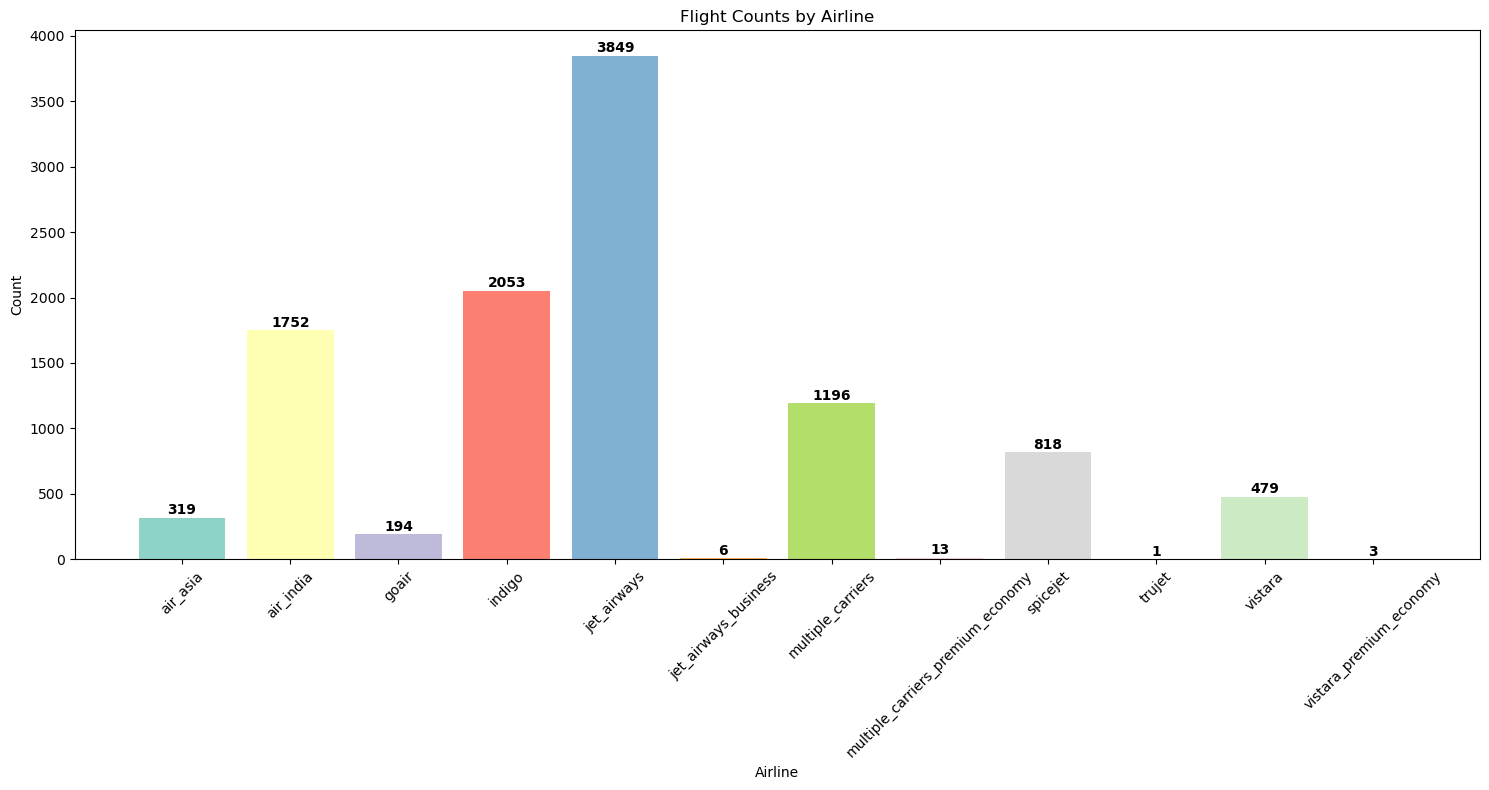

In [47]:
# Extract keys and values
airlines = list(airline_count.keys())
counts = list(airline_count.values())

# Choose colors (you can change the color map if desired)
colors = plt.cm.Set3.colors[:len(airlines)]

# Create the plot
plt.figure(figsize=(15, 8))
bars = plt.bar(x=airlines, height=counts, color=colors)

# Add count labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1, f'{int(height)}', 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Axis labels and styling
plt.xlabel('Airline')
plt.ylabel('Count')
plt.title('Flight Counts by Airline')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()